# MILESTONE 1

## Introduction

`Kezia Intan Natalie`

`Batch 03`

## Problem Statement

Buatlah model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kalian simpan.

## Objective Problems

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !
2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !
3. Bagaimana cara memilih K yang optimal pada KNN ?
4. Jelaskan apa yang dimaksud dengan Cross Validation !
5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

## SQL Queries

Take our data from google cloud with sql query

`select limit_balance,`\
`cast(sex as INT64) as sex,`\
`cast (education_level as INT64) as education_level,`\
`cast(marital_status as INT64) as marital_status,`\
`age, pay_0, pay_2, pay_3, pay_4,`\
`cast(pay_5 as FLOAT64) as pay_5,`\
`cast(pay_6 as FLOAT64) as pay_6,`\
`bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,`\
`cast(default_payment_next_month as INT64) as default_payment_next_month`\
`from bigquery-public-data.ml_datasets.credit_card_default`\
`limit 6003`

## Import Library

Import all library we will use

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, ConfusionMatrixDisplay

import joblib

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Now call the dataset that we saved earlier

In [3]:
# Read the csv
df = pd.read_csv('h8dsft_P1M1_KeziaIntan.csv')

In [4]:
# For showing all columns
pd.set_option('display.max_columns', None)

In [5]:
# Showing first ten rows
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
5,500000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,155820.0,171565.0,184782.0,152365.0,139757.0,153348.0,20000.0,20241.0,20154.0,20019.0,20151.0,20037.0,0
6,50000.0,1,2,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,49073.0,49531.0,44002.0,44356.0,19344.0,19354.0,1691.0,1942.0,1296.0,674.0,693.0,1000.0,0
7,100000.0,1,5,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,94502.0,95697.0,98222.0,90500.0,82586.0,22620.0,5000.0,5000.0,3203.0,2103.0,50000.0,0.0,0
8,140000.0,1,2,1,29.0,0.0,0.0,0.0,0.0,0.0,0.0,130767.0,134946.0,130470.0,132038.0,131961.0,124256.0,6696.0,5000.0,4866.0,5300.0,5055.0,5000.0,0
9,50000.0,1,2,1,43.0,0.0,0.0,0.0,0.0,0.0,0.0,48919.0,48775.0,48731.0,48934.0,29116.0,28999.0,1800.0,2200.0,1400.0,582.0,580.0,30000.0,0


In [6]:
# Showing last ten rows
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000.0,2,2,1,28.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,16666.0,1000.0,16666.0,0.0,0.0,0.0,1000.0,16666.0,0.0,0.0,0.0,0.0,0
2956,200000.0,2,1,1,49.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,413.0,0.0,103.0,0.0,0.0,0.0,0.0,103.0,0.0,0.0,0.0,225.0,0
2957,50000.0,2,1,2,31.0,-1.0,0.0,-1.0,-1.0,-1.0,-2.0,12725.0,34526.0,12787.0,3995.0,0.0,0.0,30018.0,12787.0,3995.0,0.0,0.0,0.0,0
2958,50000.0,2,1,2,25.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,13572.0,17983.0,15590.0,10610.0,0.0,0.0,5000.0,200.0,10610.0,0.0,0.0,0.0,0
2959,100000.0,2,1,2,37.0,-1.0,-1.0,0.0,-1.0,-1.0,-2.0,1725.0,21711.0,10487.0,780.0,0.0,0.0,21711.0,1000.0,780.0,0.0,0.0,0.0,0
2960,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2961,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2962,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2963,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2964,100000.0,2,1,2,30.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,430.0,35993.0,2772.0,0.0,0.0,0.0,35993.0,2772.0,0.0,0.0,0.0,0.0,0


Check how many entries data

In [7]:
# Rows, Columns
df.shape

(2965, 24)

See the information of each columns

In [8]:
# Info columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

Now check the missing value

In [9]:
# Missing value
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

There is no missing value in our data

Now check the unique value

In [10]:
# Unique value
df.nunique()

limit_balance                   59
sex                              2
education_level                  7
marital_status                   4
age                             49
pay_0                           11
pay_2                           10
pay_3                            9
pay_4                           10
pay_5                            9
pay_6                            8
bill_amt_1                    2643
bill_amt_2                    2592
bill_amt_3                    2549
bill_amt_4                    2504
bill_amt_5                    2482
bill_amt_6                    2461
pay_amt_1                     1415
pay_amt_2                     1372
pay_amt_3                     1302
pay_amt_4                     1214
pay_amt_5                     1194
pay_amt_6                     1189
default_payment_next_month       2
dtype: int64

## Data Cleaning

Now check if there are duplicate data

In [11]:
# Duplicate
df[df.duplicated]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2381,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


There are duplicates data now we have to drop it

In [12]:
# Drop the duplicate
df.drop(df[df.duplicated()].index, inplace=True)
# Reset the index
df.reset_index(drop=True)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,0.0,58180.0,59134.0,61156.0,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
1,230000.0,1,2,1,41.0,0.0,0.0,0.0,0.0,0.0,0.0,301038.0,305327.0,213058.0,216260.0,215968.0,174195.0,9405.0,7769.0,7757.0,8030.0,6549.0,5226.0,1
2,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,192461.0,195970.0,122214.0,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
3,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,133598.0,167378.0,171106.0,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
4,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,0.0,160879.0,161797.0,165107.0,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,30000.0,2,3,2,50.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0,178.0,1860.0,940.0,1110.0,0.0,0.0,1860.0,0.0,1110.0,0.0,0.0,0.0,1
2960,20000.0,2,1,2,25.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,2650.0,0.0,855.0,640.0,0.0,0.0,0.0,855.0,640.0,0.0,0.0,2742.0,0
2961,280000.0,2,1,2,52.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,886.0,0.0,930.0,0.0,0.0,0.0,0.0,930.0,0.0,0.0,0.0,0.0,0
2962,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1968.0,459.0,2500.0,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0


Now there is no more duplicate data

In [13]:
df[df.duplicated]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month


## Exploratory Data Analysis

Check the mean, min, max of numeric columns

In [14]:
# Describe
df.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000,2.964000e+03,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,163356.950067,1.607625,1.849865,1.560054,35.193657,0.004723,-0.121795,-0.141026,-0.184548,-0.224696,-0.254049,52135.889001,50666.241228,48256.032726,44104.558367,40969.898448,39786.491228,6351.044872,6.274611e+03,5152.234818,4562.914980,4914.944332,5384.517544,0.214238
std,125049.701016,0.488362,0.778159,0.522304,9.110949,1.114434,1.180479,1.183337,1.178049,1.158739,1.167061,72334.536115,70790.828470,68151.445516,61912.600106,58276.878626,57308.498646,20888.933729,2.888432e+04,14289.177313,13283.476236,16736.920951,17278.585006,0.410362
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3979.750000,3403.500000,3311.750000,2585.000000,1974.500000,1433.000000,1013.000000,9.975000e+02,479.250000,313.750000,325.250000,175.250000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24325.000000,23169.000000,21549.500000,19895.000000,18819.500000,18511.500000,2238.000000,2.182500e+03,1997.000000,1600.000000,1646.500000,1626.500000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69863.000000,67836.250000,63034.500000,58638.500000,53414.500000,52297.000000,5089.500000,5.000000e+03,4500.000000,4000.250000,4021.000000,4081.750000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Seperate the numerical and categorical columns

In [15]:
# Numerical
num_col = df.columns[df.dtypes != 'object'].to_list()
num_col

['limit_balance',
 'sex',
 'education_level',
 'marital_status',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt_1',
 'bill_amt_2',
 'bill_amt_3',
 'bill_amt_4',
 'bill_amt_5',
 'bill_amt_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6',
 'default_payment_next_month']

In [16]:
# Categorical
cat_col = df.columns[df.dtypes == 'object'].to_list()
cat_col

[]

There no categorical columns based on data type

### Now see the average payment based on limit balance

These are information of columns pay:\
Pay 0 = payment in September 2005\
Pay 2 = payment in August 2005\
Pay 3 = payment in July 2005\
Pay 4 = payment in June 2005\
Pay 5 = payment in May 2005\
Pay 6 = payment in April 2005

For all pay columns there are number code there are:\
-0.2 = already pay two months ago\
-0.1 = already pay a month ago\
0.0 = pay this month\
1.0 = pay delay for a month\
2.0 = pay delay for two month\
3.0 = pay delay for three month\
4.0 = pay delay for four month\
5.0 = pay delay for five month\
6.0 = pay delay for six month\
7.0 = pay delay for seven month\
8.0 = pay delay for eight month

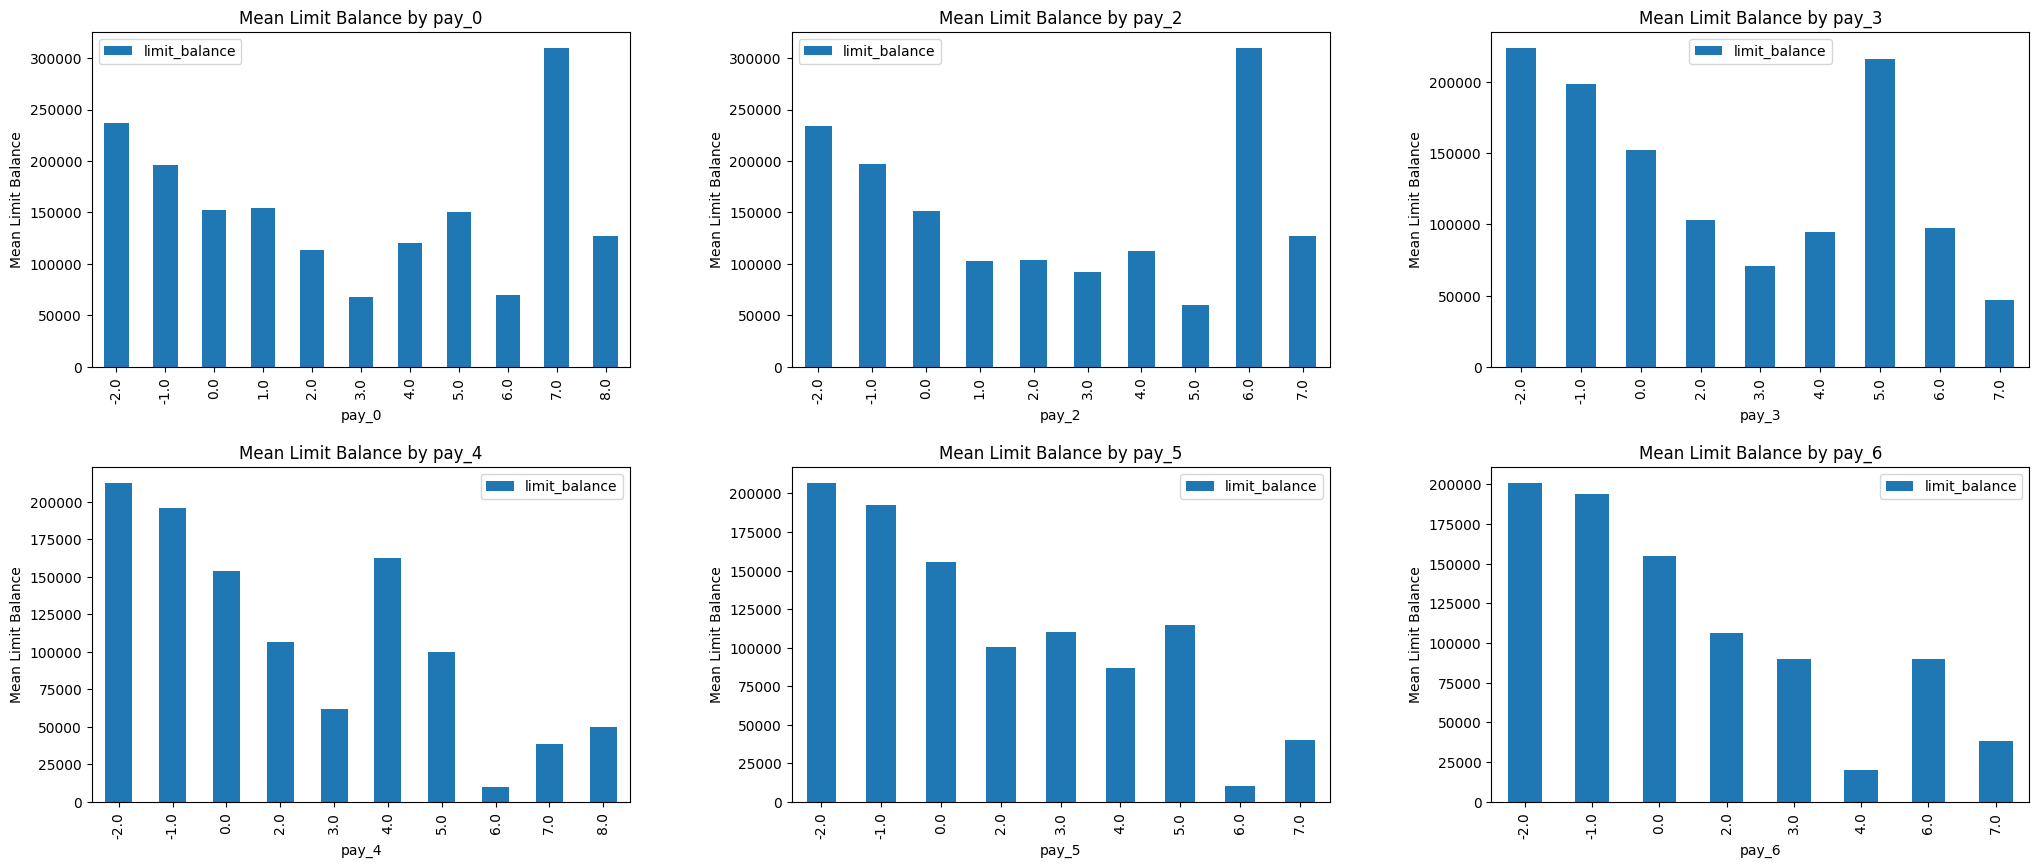

In [77]:
columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

fig, axs = plt.subplots(2, 3, figsize=(25,10))
axs = axs.ravel()
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i, col in enumerate(columns):
    df.groupby(col)[['limit_balance']].mean().sort_values(col).plot(kind='bar', ax=axs[i])
    axs[i].set_title(f"Mean Limit Balance by {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Mean Limit Balance")

plt.show()

Make the plot of average payment based on limit balance

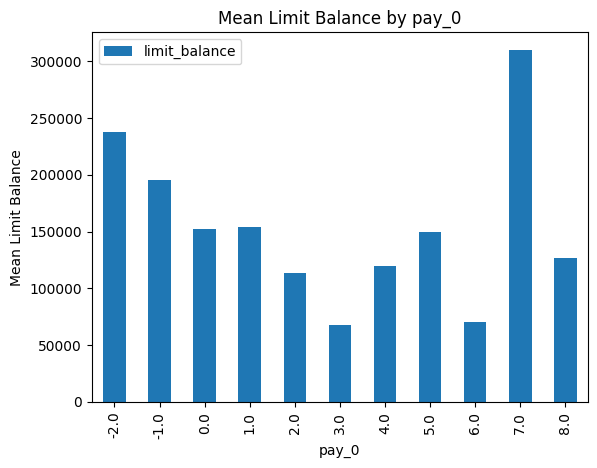

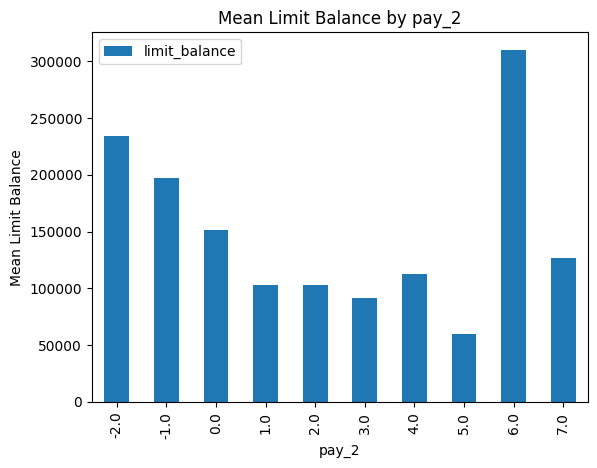

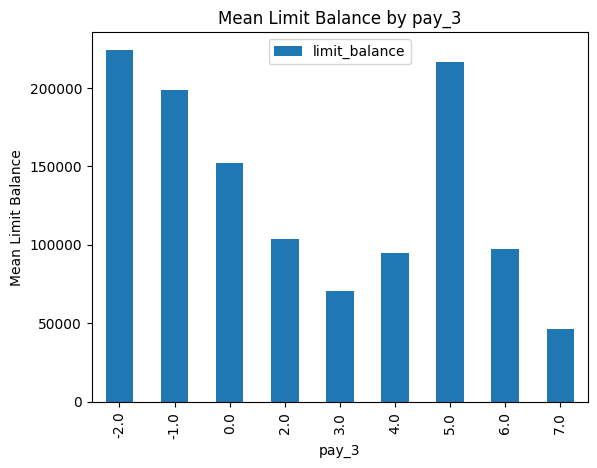

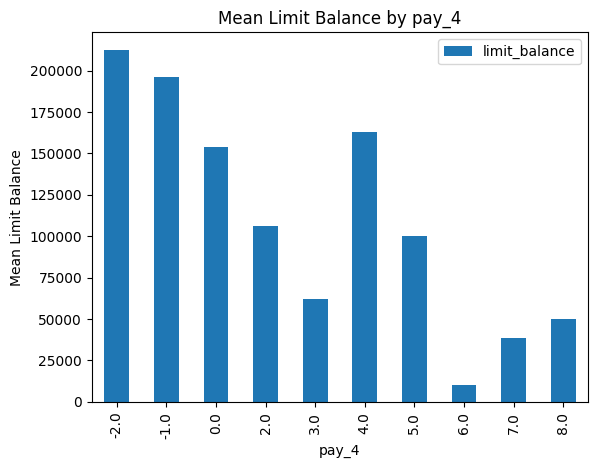

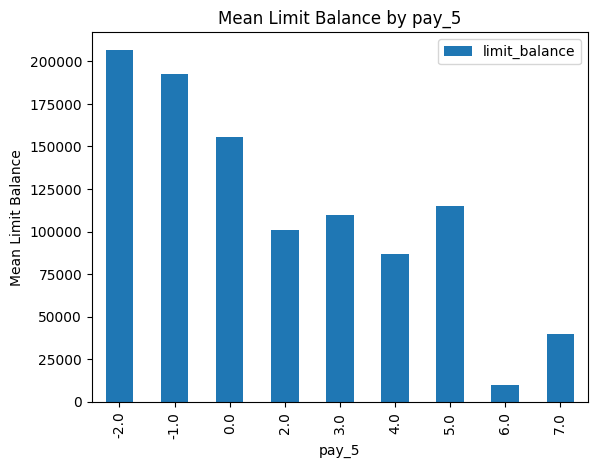

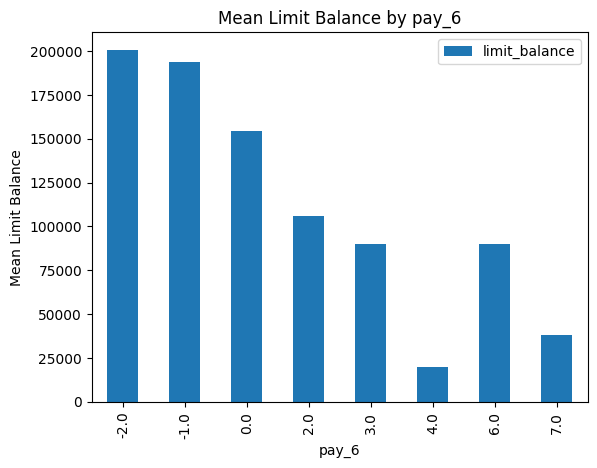

In [51]:
# Visualize
columns = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in columns:
    df.groupby(col)[['limit_balance']].mean().sort_values(col).plot(kind='bar')
    plt.title(f"Mean Limit Balance by {col}")
    plt.xlabel(col)
    plt.ylabel("Mean Limit Balance")
    plt.show()

In column `pay 0` the averange of `limit balance` is more in number 7 which is they delayed the payment for seven months\
In column `pay 2` the averange of `limit balance` is more in number 6 which is they delayed the payment for six months\
In column `pay 3` the averange of `limit balance` is more in number 5 and -2 which is some people delayed the payment for five months and some already paid in two months ago\
In columns `pay 4`, `pay 5`, `pay 6` the averange of `limit balance` is more in number -2 which is they already paid two months ago

Now see the correlation of each columns using heatmap

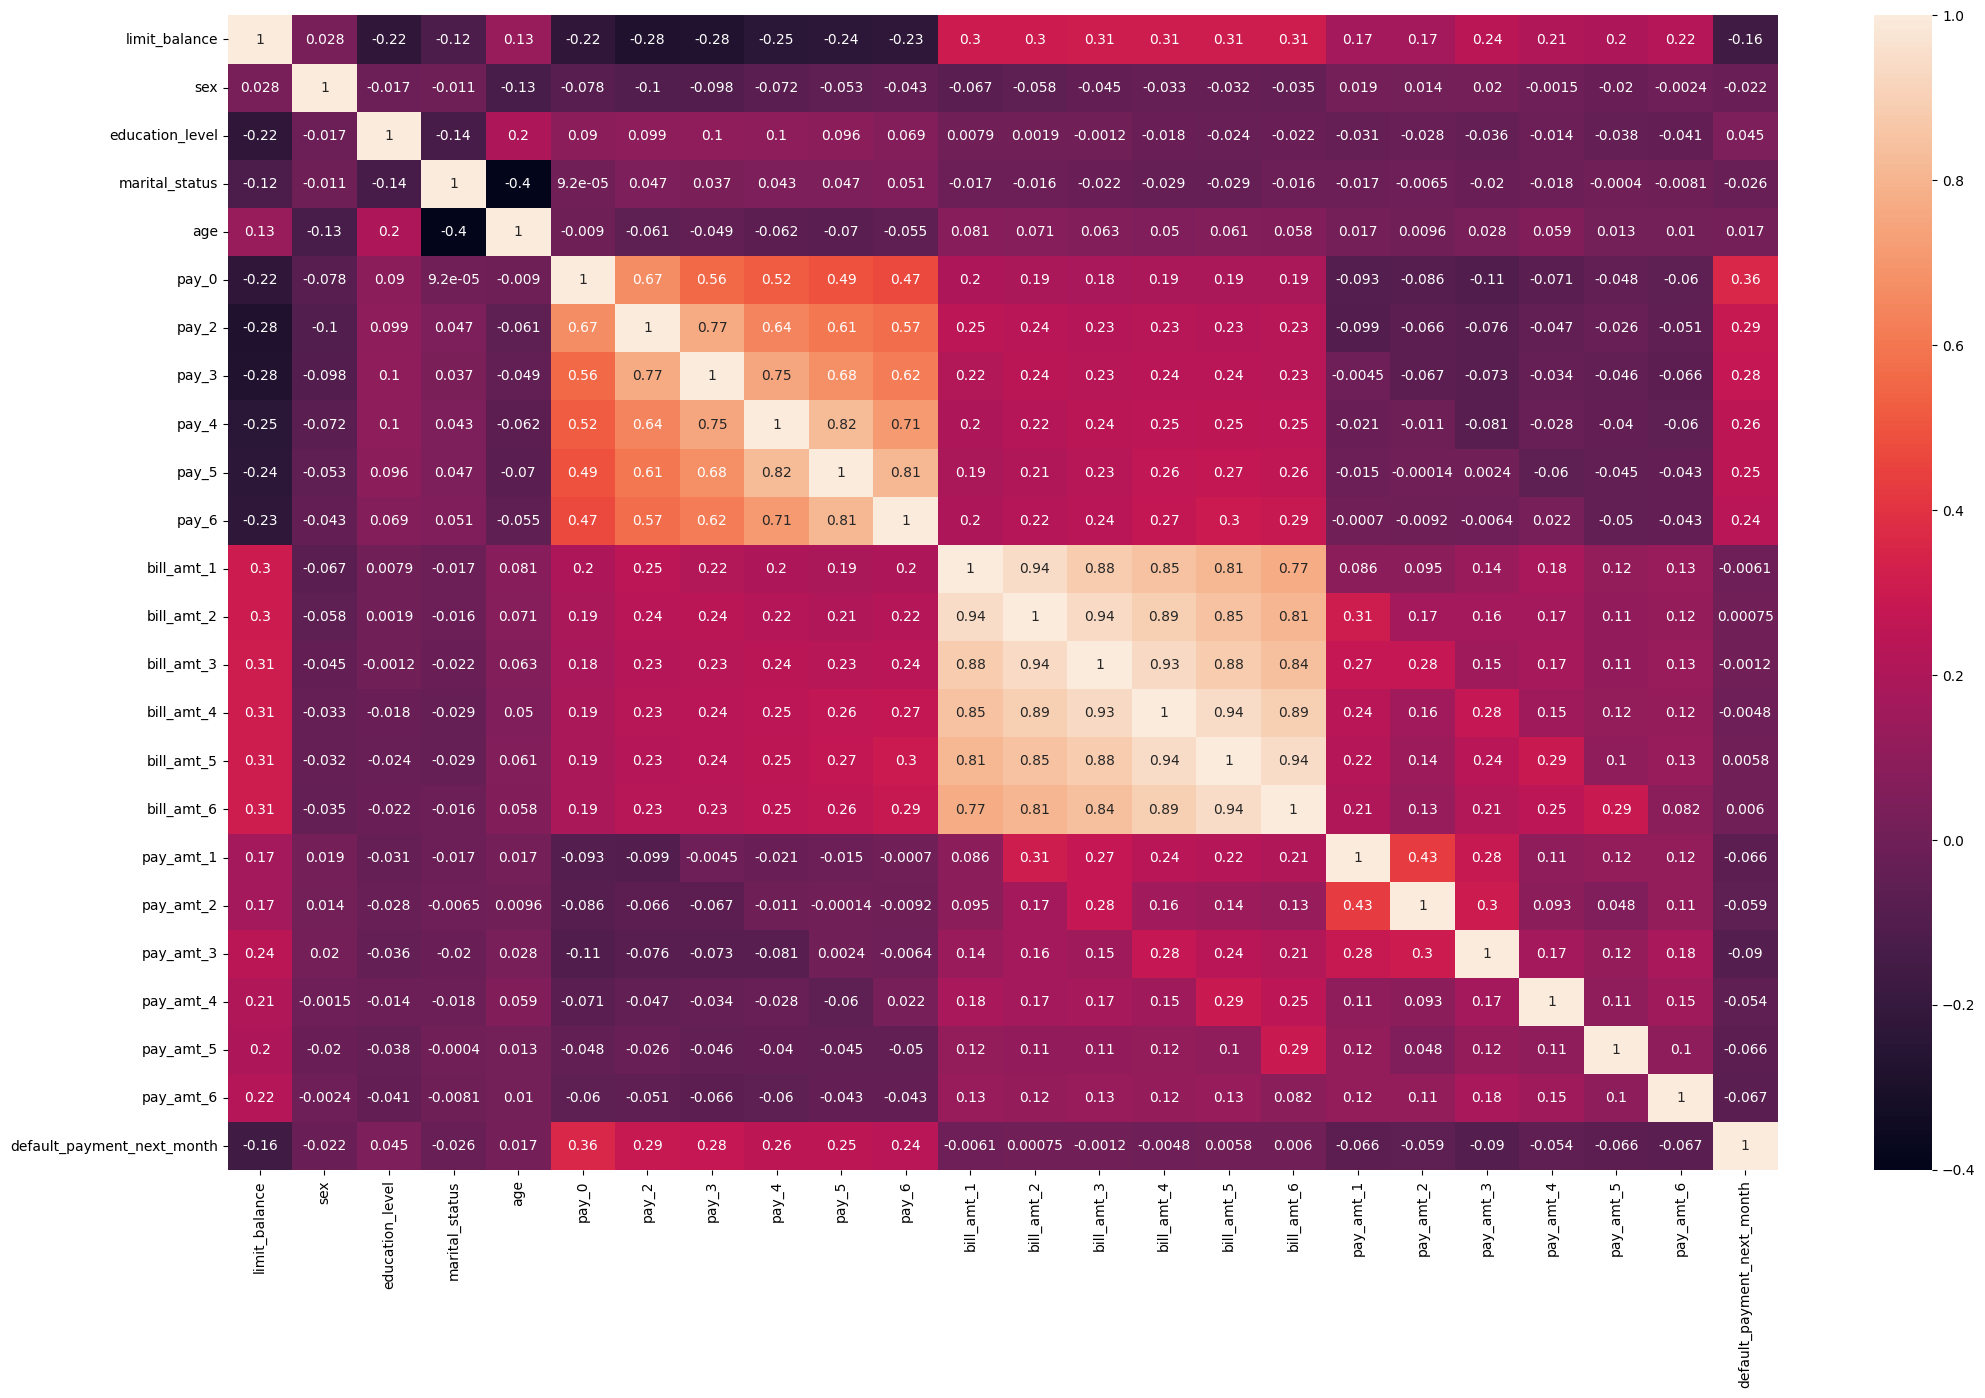

In [18]:
# Correlation
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

By using 0.1 threshold these are the feature that we will use:
- limit balance
- pay 0
- pay 2
- pay 3
- pay 4
- pay 5
- pay 6

## Data Preprocessing

### Split Train and Test

Now split the feature and target

In [19]:
# Define feature and target
x = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Feature Engineering

Split the numerical and categorical feature 

In [20]:
num_col = ['limit_balance']

In [21]:
cat_col = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [22]:
df[num_col+cat_col]

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,130000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,230000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,200000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,500000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2960,30000.0,-1.0,-1.0,2.0,-1.0,-1.0,-2.0
2961,20000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
2962,280000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0
2963,360000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0


Concate the train and test with feature numerical and categorical

In [23]:
x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

Check the outliers of numerical column

In [24]:
def diagnostic_plots(x_train_num, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_num[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=x_train_num[variable])
    plt.title('Boxplot')

    plt.show()

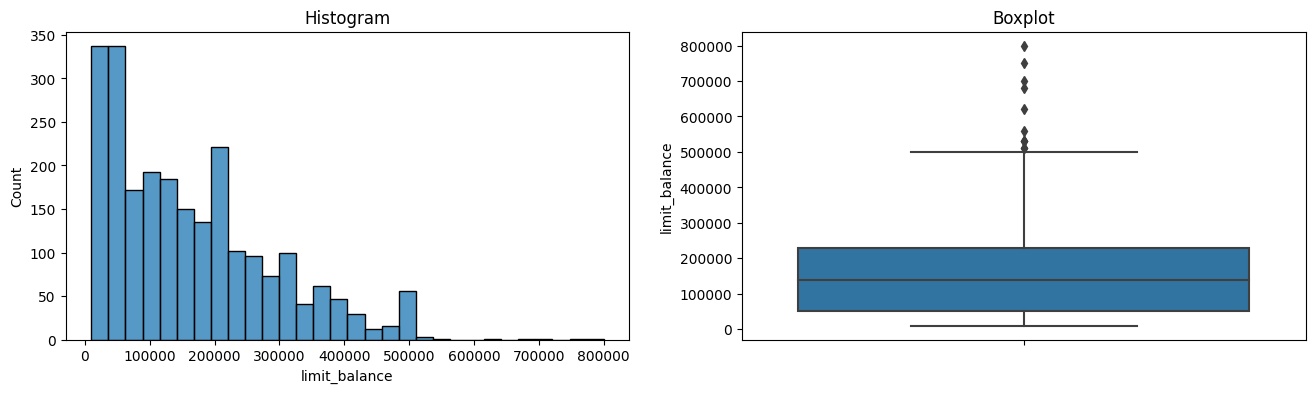

In [25]:
diagnostic_plots(x_train_num, 'limit_balance')

There are outliers in our visualization then check how many percent it is

In [26]:
# Outlier detection using IQR 
Q3 = x_train_num['limit_balance'].quantile(.75)
Q1 = x_train_num['limit_balance'].quantile(.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

outlier = x_train_num[(x_train_num['limit_balance'] > upper) | (x_train_num['limit_balance'] < lower)]

print('count of outlier: ', outlier.shape[0])
print('percentage of outlier: ', outlier.shape[0]/df.shape[0] * 100, '%')

count of outlier:  11
percentage of outlier:  0.37112010796221323 %


There are 11 entries data which is 0.3% of our data, so we don't have drop or scale it\
And also we can't drop it because it is a limit balance of a credit card

### Scale and Encode

Now scale the numerical data using `minmaxscaler` because our data is normal distribution

In [27]:
scale = MinMaxScaler()
scale.fit(x_train_num)

x_train_num_scale = scale.transform(x_train_num)
x_test_num_scale = scale.transform(x_test_num)

x_train_num_scale

array([[0.11392405],
       [0.05063291],
       [0.17721519],
       ...,
       [0.02531646],
       [0.37974684],
       [0.44303797]])

Here we don't have to encode the categorical columns because it's already in the form of number

Now concate the numerical scaled with the categorical columns

In [28]:
# Concate the feature
x_train_final = np.concatenate([x_train_num_scale, x_train_cat], axis=1)
x_test_final = np.concatenate([x_test_num_scale, x_test_cat], axis=1)

In [29]:
# Show on dataframe
x_train_final = pd.DataFrame(x_train_final, columns=[num_col+cat_col])
x_train_final

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,0.113924,0.0,0.0,0.0,0.0,0.0,0.0
1,0.050633,0.0,0.0,0.0,2.0,0.0,0.0
2,0.177215,0.0,0.0,0.0,0.0,0.0,-2.0
3,0.025316,1.0,3.0,2.0,2.0,3.0,2.0
4,0.012658,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2366,0.063291,0.0,0.0,0.0,0.0,0.0,0.0
2367,0.012658,0.0,0.0,0.0,0.0,0.0,0.0
2368,0.025316,2.0,0.0,0.0,0.0,0.0,2.0
2369,0.379747,-1.0,0.0,0.0,0.0,-1.0,-1.0


## Model Definition

Now define all model

In [30]:
# Defining Logistic Regression Model
log_model = LogisticRegression(max_iter=1000000) # Iteration for converge
# Defining SVM Classifier Model
svm_model = SVC()
# Defining Decision Tree Classifier Model
dt_model = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining KNN Classifier Model
knn_model = KNeighborsClassifier()
# Defining naive bayes Model
nb_model = GaussianNB()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()

## Cross Validation

Check all validation of each models

In [83]:
# Checking cross validation score
skfold=StratifiedKFold(n_splits=5)
cv_log_model = cross_val_score(log_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada_model, x_train_final, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb_model, x_train_final, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_ada_model,cv_nb_model],['log_model','svm_model','dt_model','rf_model','knn_model','ada_model','nb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.33333333 0.37623762 0.2970297  0.32673267 0.32352941]
recall - Mean - Cross Validation :  0.3313725490196079
recall - Std - Cross Validation  :  0.025609349583937693
recall - Range of Test-Set       :  0.3057631994356702 - 0.35698189860354557
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.35294118 0.47524752 0.3960396  0.42574257 0.44117647]
recall - Mean - Cross Validation :  0.4182294700058241
recall - Std - Cross Validation  :  0.04144640289862047
recall - Range of Test-Set       :  0.37678306710720366 - 0.45967587290444456
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.3627451  0.44554455 0.33663366 0.3960396  0.43137255]
recall - Mean - Cross Validation :  0.3944670937682004
recall - Std - Cross Validation  :  0.04080289962968861
recall - Range of Test-Set       :  0.3536641941385118 - 0.43526999339788897
------------------------

Here we got `naive bayes` as our best model with cross validation 0.44

## Model Predict

Now predict our data with the best model

In [32]:
nb_model.fit(x_train_final, y_train)

nb_pred_train = nb_model.predict(x_train_final)
nb_pred_test = nb_model.predict(x_test_final)

nb_pred_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Model Evaluate

Now evaluate our predicted model with classification report

clasification report train nb =               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1864
           1       0.60      0.44      0.51       507

    accuracy                           0.82      2371
   macro avg       0.73      0.68      0.70      2371
weighted avg       0.80      0.82      0.81      2371

clasification report test nb =               precision    recall  f1-score   support

           0       0.86      0.90      0.88       465
           1       0.57      0.46      0.51       128

    accuracy                           0.81       593
   macro avg       0.71      0.68      0.69       593
weighted avg       0.80      0.81      0.80       593

Confusion Matrix      : 


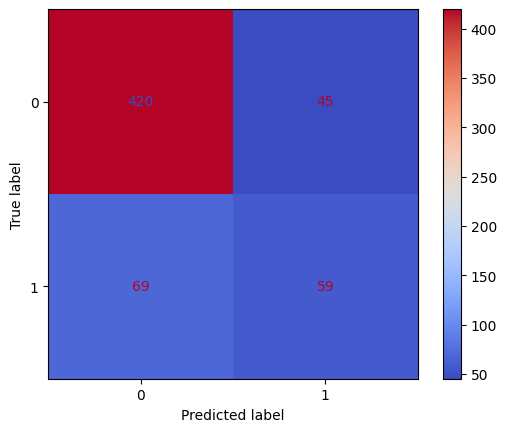

In [81]:
print('clasification report train nb =', classification_report(y_train, nb_pred_train))
print('clasification report test nb =', classification_report(y_test, nb_pred_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_model, x_test_final, y_test, cmap='coolwarm'))

Here we got recall 0.44 in train data and 0.46 in test data which is overfitting

## Hyperparameter Tunning

Now tune the model using `gridseacrhcv` to make it better and see if there is any difference 

In [34]:
hyperparameters = {
    'var_smoothing': np.logspace(0,-9, num=10)
}

nb_grid = GridSearchCV(nb_model, hyperparameters, cv = 10, scoring='recall', return_train_score=True)
nb_grid.fit(x_train_final, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             return_train_score=True, scoring='recall')

See the best parameter

In [35]:
nb_grid.best_params_

{'var_smoothing': 0.01}

See the best score of recall

In [36]:
nb_grid.best_score_

0.44400000000000006

See all cross validation

In [37]:
nb = pd.DataFrame(nb_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
nb.sort_values(['mean_test_score', 'mean_train_score'], ascending=False)

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
3,{'var_smoothing': 0.001},0.444000,0.061189,0.443351,0.006893
4,{'var_smoothing': 0.0001},0.444000,0.061189,0.443351,0.006893
5,{'var_smoothing': 1e-05},0.444000,0.061189,0.443351,0.006893
6,{'var_smoothing': 1e-06},0.444000,0.061189,0.443351,0.006893
7,{'var_smoothing': 1e-07},0.444000,0.061189,0.443351,0.006893
8,{'var_smoothing': 1e-08},0.444000,0.061189,0.443351,0.006893
9,{'var_smoothing': 1e-09},0.444000,0.061189,0.443351,0.006893
2,{'var_smoothing': 0.01},0.444000,0.061189,0.442475,0.006484
1,{'var_smoothing': 0.1},0.438078,0.058909,0.436338,0.006242
0,{'var_smoothing': 1.0},0.299725,0.057659,0.305067,0.011041


Now predict using the model tuned

In [38]:
nb_grid.fit(x_train_final, y_train)

nb_grid_train = nb_model.predict(x_train_final)
nb_grid_test = nb_model.predict(x_test_final)

nb_grid_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Now evaluate the data

clasification report train nb =               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1864
           1       0.60      0.44      0.51       507

    accuracy                           0.82      2371
   macro avg       0.73      0.68      0.70      2371
weighted avg       0.80      0.82      0.81      2371

clasification report test nb =               precision    recall  f1-score   support

           0       0.86      0.90      0.88       465
           1       0.57      0.46      0.51       128

    accuracy                           0.81       593
   macro avg       0.71      0.68      0.69       593
weighted avg       0.80      0.81      0.80       593

Confusion Matrix      : 


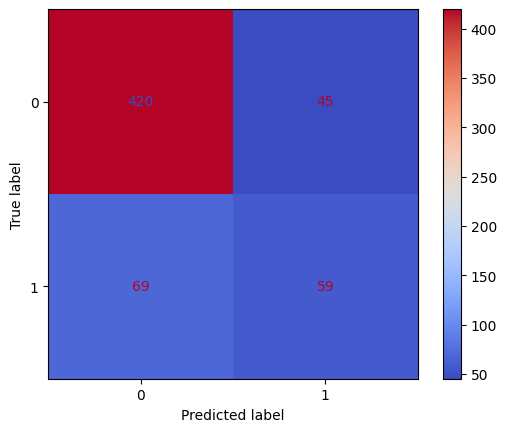

In [79]:
print('clasification report train nb =', classification_report(y_train, nb_grid_train))
print('clasification report test nb =', classification_report(y_test, nb_grid_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb_grid, x_test_final, y_test, cmap='coolwarm'))

There is no difference between before and after tunning which means it's already the best model of our data

## Model Analysis

The model may have reached the limit of its performance and no further improvement is possible or maybe the feature don't have enough information to make accurate prediction. 

## Model Saving

Now save all model

In [40]:
# Save model

with open('model_nb.pkl', 'wb') as file_1:
  joblib.dump(nb_grid, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scale, file_2)

with open('list_num_col.txt', 'wb') as file_3:
  joblib.dump(num_col, file_3)

with open('list_cat_col.txt', 'wb') as file_4:
  joblib.dump(cat_col, file_4)

## Conceptual Problems

*`1.`*  Criteration is a function to measure the quality of split. The goal is to find the split that results in the greatest decrease in impurity or entropy, as this split will lead to the most homogeneous.

*`2.`*  Pruning in tree-based models is the process of removing branches that do not contribute much to the accuracy of the model, with the goal of simplifying the tree and reducing overfitting.
There are different ways of pruning method : 
- Reduce error pruning : It removes branches that don't improve the accuracy of the model.
- Cost complexity pruning : It controls the complexity of the model by adding a cost to the complexity of the tree.
- Minumun desciption lenght : It removes branches that don't significantly decrease the length of the code needed to describe the tree.

*`3.`*  It can get trough cross validation, elbow method, and grid search.

*`4.`*  Cross validation is a technique used to evaluate the performance of a model by training it on a data and testing it on a different data. The goal of cross validation is to estimate the performance of the model on unseen data by training it on a subset of the data and then testing it.

*`5.`* 
- Accuracy: It is the ratio of the number of correct predictions to the total number of predictions made by the model. It is a simple and intuitive metric, but it can be misleading in cases where the class distribution is imbalanced.

- Precision: It is the ratio of the number of true positive predictions to the total number of positive predictions made by the model. It measures how many of the positive predictions made by the model are actually correct. High precision means that the model has a low false positive rate.

- Recall: It is the ratio of the number of true positive predictions to the total number of actual positive instances in the data. It measures how many of the actual positive instances in the data were correctly identified by the model. High recall means that the model has a low false negative rate.

- F1 Score: It is the harmonic mean of precision and recall. It balances precision and recall, and it is a good metric to use when you want to find a balance between precision and recall.

## Overall Analysis

After take the data we analyze it see the duplicate, missing value, outliers of our data. See the correlation of each column for take our feature and see the distribution of our data. Split the train and test data and choose the feature. And then scale the numerical data and encode the categorical data.\
Then search the best model for our data then predict. If the model didn't good enough tuning the hyperparameter, here we tuning the recall score for increase the true positive prediction and decrease the false positive prediction. Here our model didn't show any improvement so just save the model and make inference from generate random data.\
Our generate random data all predicted as 1 or default or will payment on next month.